# NAME : MOHD FAIZAN

# Task-1 - Exploratory Data Analysis on IPL data

# Level: Advanced

# Data Source: https://bit.ly/34SRn3b

# GRIP-MARCH 2022

1. Problem Statement

"This is IPL's data containing 2 datasets - one gives details about the venues and players while the other captures ball-by-ball stats over 12 years of the league (2008-2019)". Here we try to get an overview of IPL in terms of teams, venues, umpires, toss decisions, winners and individual batsmen and bowlers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing 1st dataset

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Importing 2nd Dataset

In [4]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
merge_df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [7]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
matches.shape

(756, 18)

In [9]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<AxesSubplot:>

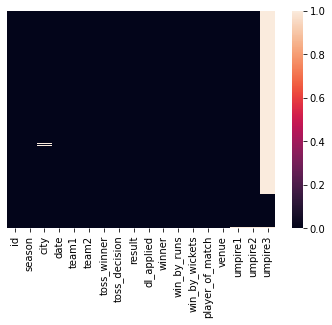

In [10]:
sns.heatmap(matches.isnull(),yticklabels=False)

<AxesSubplot:>

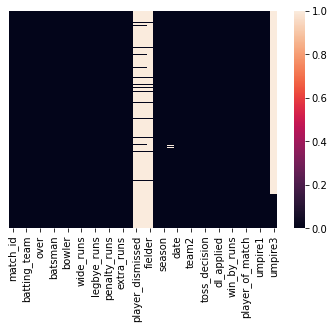

In [11]:
sns.heatmap(merge_df.isnull(),yticklabels=False)

In [12]:
#Filling in the missing values of city column
#First let's find the venues corresponding to which the values of city are empty

matches[matches.city.isnull()][['city','venue']]


,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [13]:
#City values are empty for venue = Dubai International Cricket Stadium.
#So, missing values can be filled with Dubai

In [14]:
matches.city = matches.city.fillna('Dubai')

In [15]:
matches.city.isnull().sum()

0

In [16]:
#Player of match has 3 missing values. 
#Let's see this based on result column to find why it is empty

matches[matches.player_of_match.isnull()][['player_of_match','result']]

,player_of_match,result
300,NaN,no result
545,NaN,no result
570,NaN,no result
744,NaN,no result


In [17]:
#This shows when there was no result(may be match was abandoned) then there was no player_of_match which makes sense

In [18]:
#umpire3 column has close to 92% missing values. hence dropping that column

matches = matches.drop('umpire3', axis = 1)

In [19]:
#team 1 and team2 have 14 distinct values while winner has 15 distinct values. 
#Let's check the values of the winner column

matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants. so we can just keep one of the names

In [20]:
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [21]:
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [22]:
matches.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [23]:
#In matches dataset, Rising Pune Supergiants had duplicate entries. Let's check if the same exists here as well

In [24]:
#We will check the batting_team and bowling_team values

print(deliveries.batting_team.unique())
print(deliveries.bowling_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [25]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [26]:
merge_df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


# How many matches were played each season?

In [27]:
matches.season.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

c:\users\mohdf\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


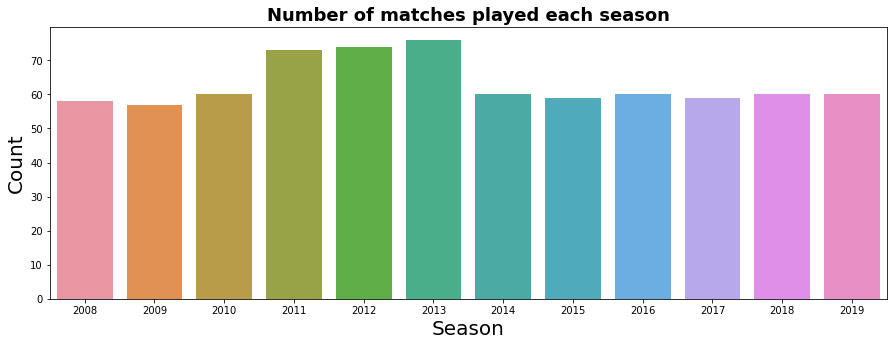

In [28]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 20)
plt.xlabel("Season", size = 20)
plt.show()

2011-2013 have more matches being played than other seasons

All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

# How many teams played in each season

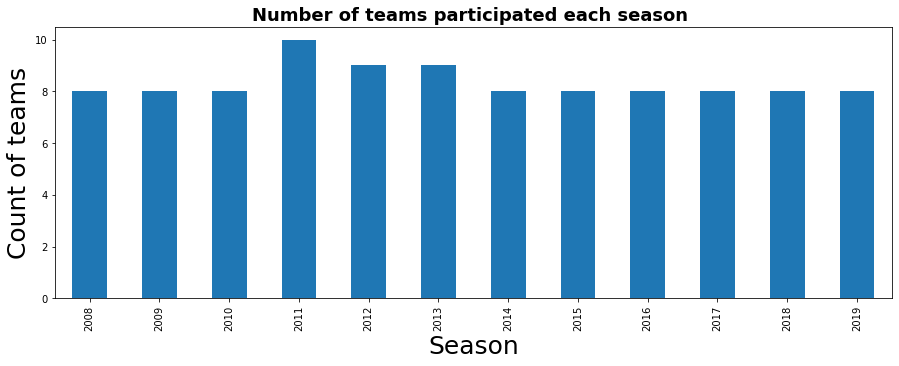

In [29]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.show()

10 teams played in 2011 and 9 teams each in 2012 and 2013
This explains why 2011-2013 have seen more matches being played than other seasons

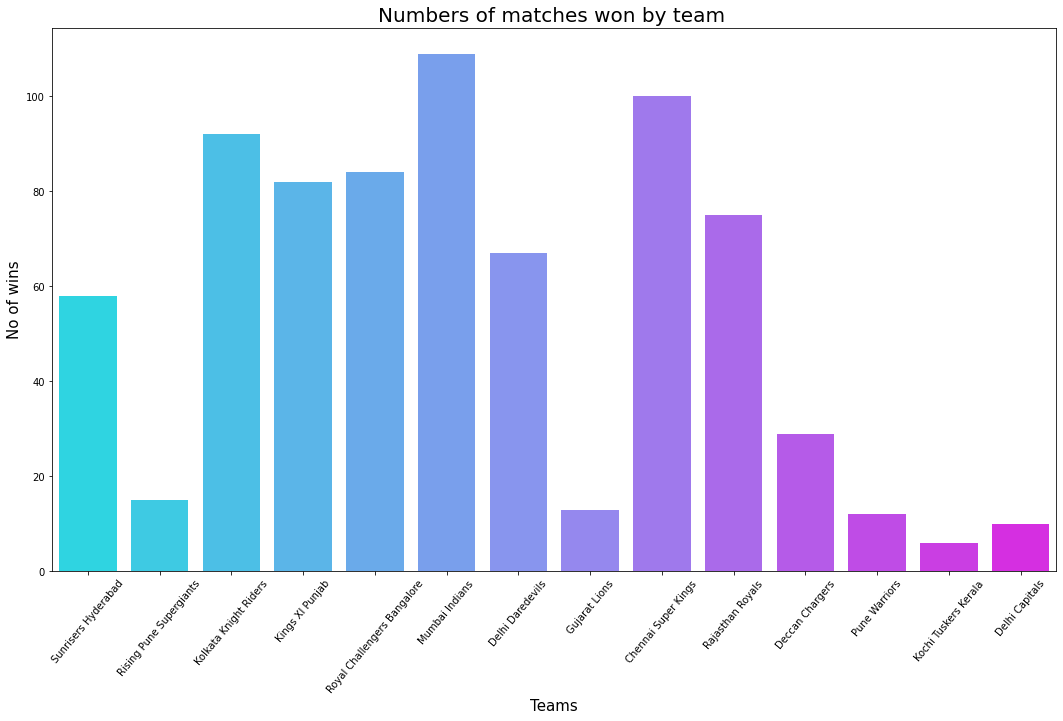

In [30]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=matches, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

# Which team has dominated IPL so far?

In [31]:
#creating a dataframe with season and winner columns
winning_teams = matches[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

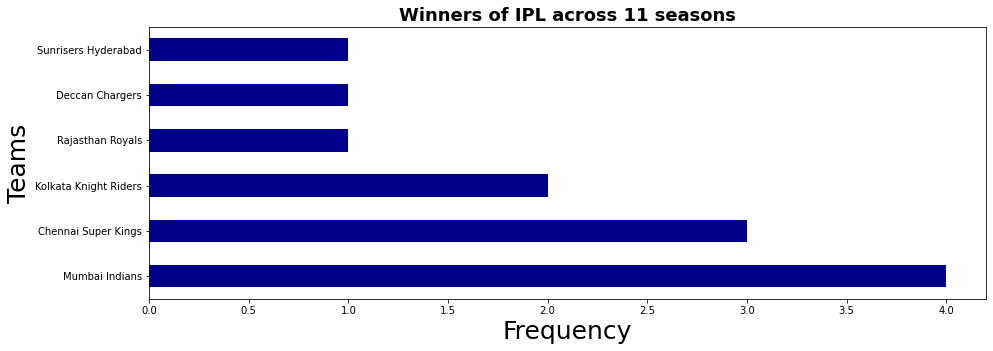

In [32]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.show()

In [33]:
# MI and CSK have both won 3 times each followed by KKR who has won 2 times.

# Do teams bat first or second after winning toss?

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

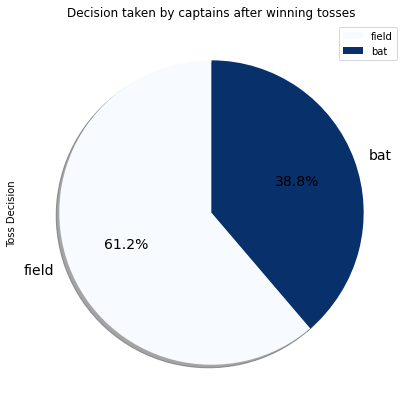

In [34]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=90, legend=True, cmap='Blues')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

In [35]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

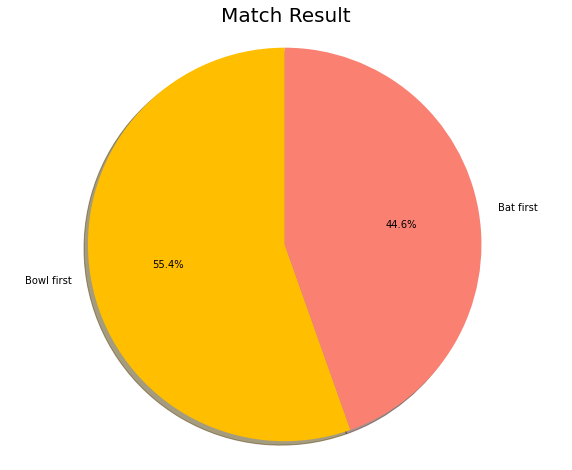

In [36]:
Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

In [37]:
#Teams batting second have won 55% times.

c:\users\mohdf\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


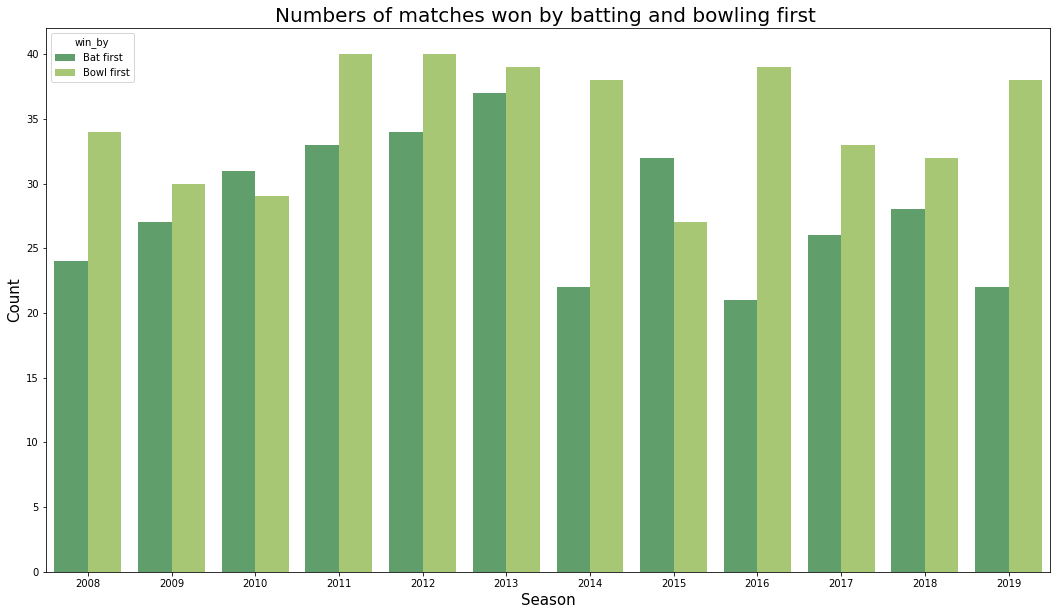

In [38]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=matches,palette='summer')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

c:\users\mohdf\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


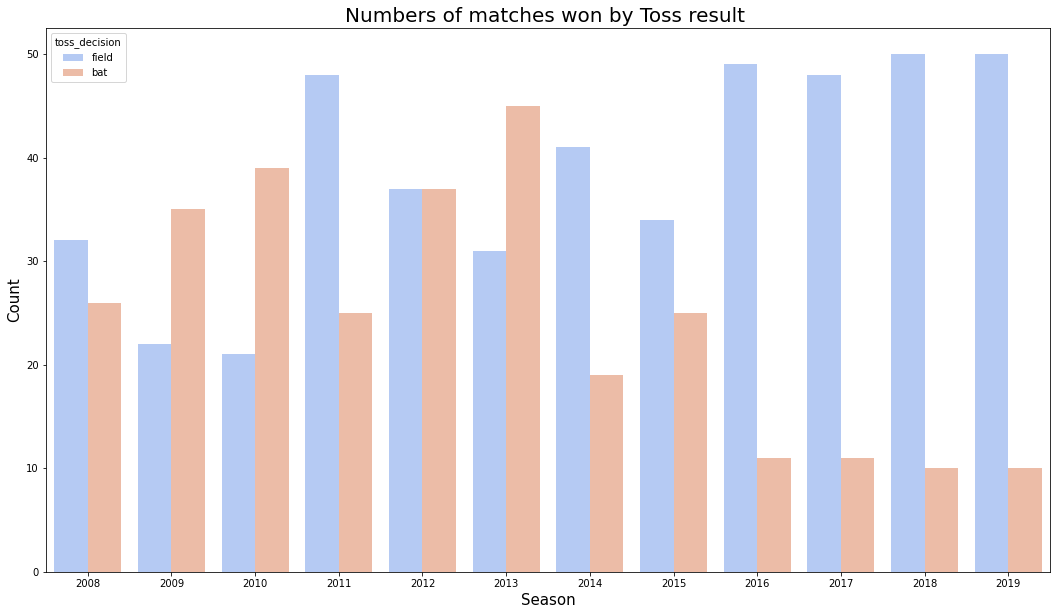

In [39]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=matches,palette='coolwarm')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [40]:
# we will print winner season wise
final_matches=matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


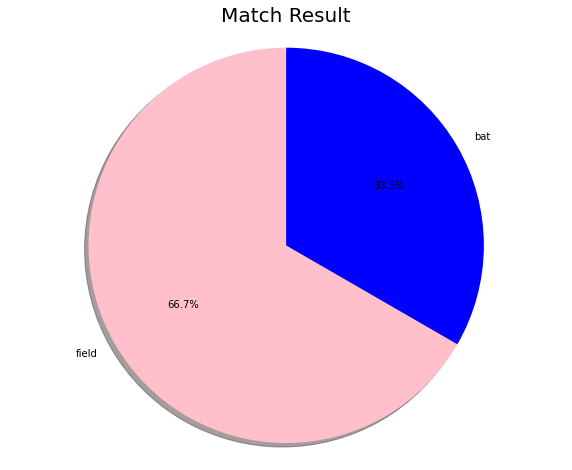

In [41]:
# we will plot pie chart on Winning percentage in final
match = final_matches.win_by.value_counts()
Toss=matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['pink', 'blue']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

# Which player's performance has mostly led to his team's win?

In [42]:
# MoM AWARD
MoM = pd.DataFrame(matches.player_of_match.value_counts())
MoM.head()

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17


Text(0.5, 0, 'Players')

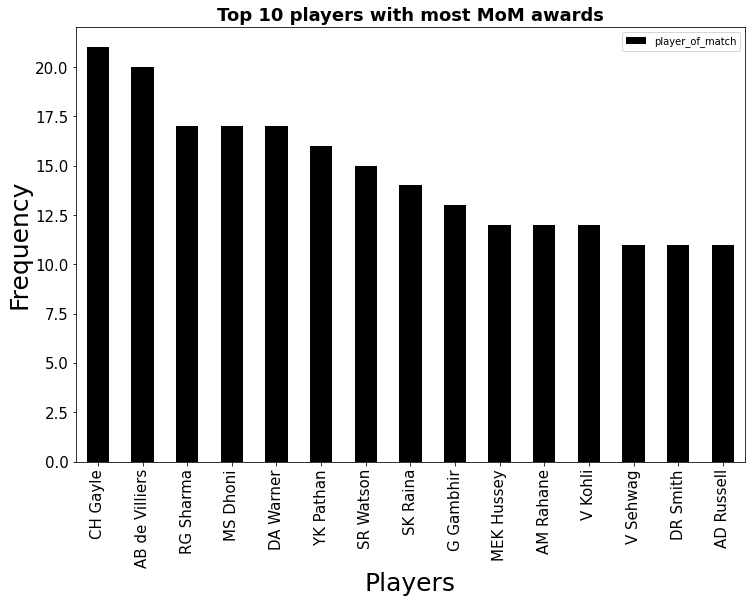

In [43]:
MoM.head(15).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='black')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

# Which team has defended handsomely after winning toss i.e. won by big margins?

In [44]:
#In order to answer this question we first need to plot the distribution win_by_runs column

Text(0, 0.5, 'Frequency')

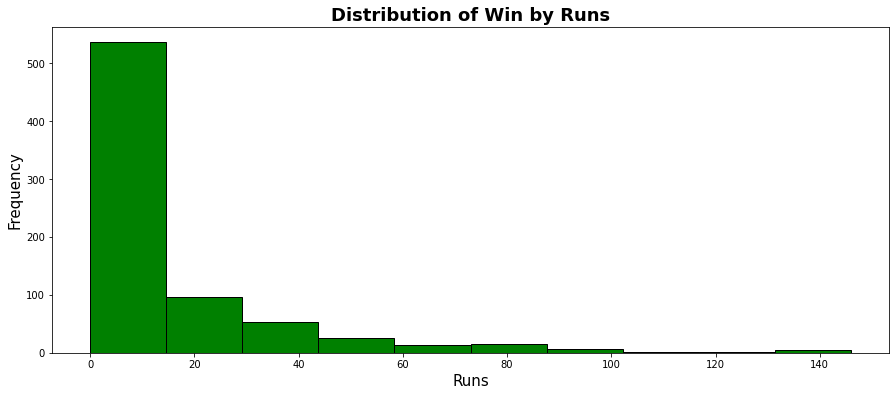

In [45]:
matches.win_by_runs.plot(kind = 'hist', edgecolor = 'black', figsize =(15,6), color = 'green') #right skewed
plt.title("Distribution of Win by Runs",fontsize= 18, fontweight = 'bold')
plt.xlabel("Runs", size = 15)
plt.ylabel("Frequency", size = 15)

#for a T20 match anything above 40 runs is quite a big win margin

c:\users\mohdf\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


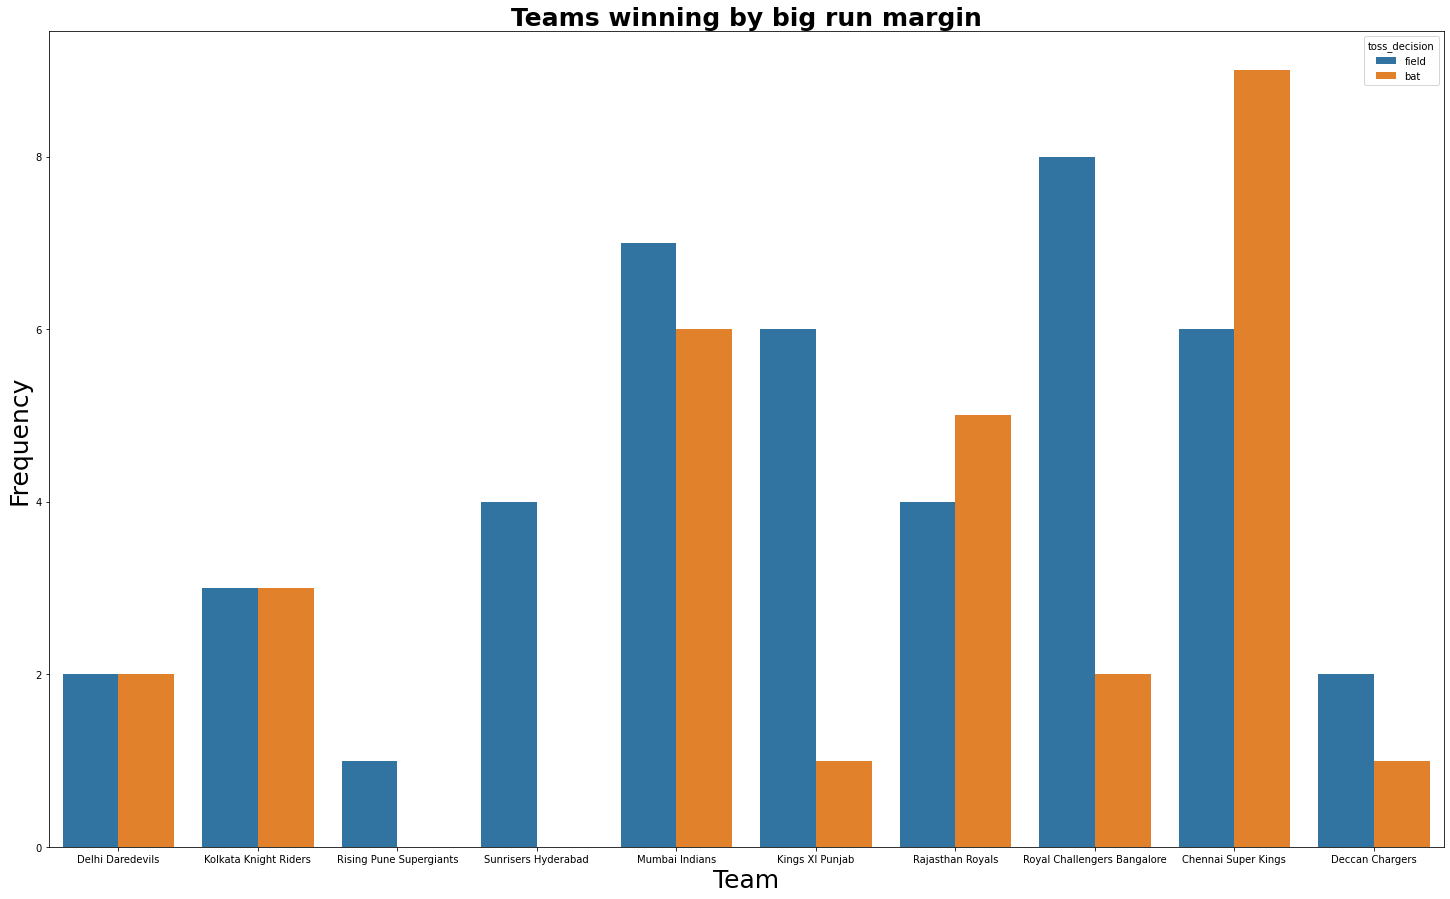

In [46]:
#Teams which have won matches by more than say 42 runs
big_run_margin = pd.DataFrame(matches[matches.win_by_runs > 42][['winner','toss_winner','toss_decision']])
plt.figure(figsize=(25,15))
sns.countplot('winner', data = big_run_margin, hue = 'toss_decision')
plt.title("Teams winning by big run margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 25)
plt.ylabel("Frequency", size = 25)
plt.show()

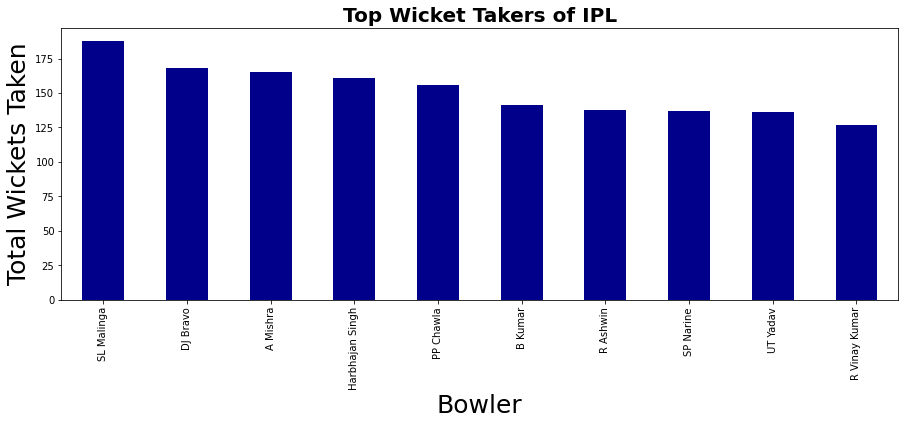

In [47]:

merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'darkblue', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.show()

In [48]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [49]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [50]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [51]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [52]:
# we will print numbers of fours hit by team
four_data=merge_df[merge_df['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


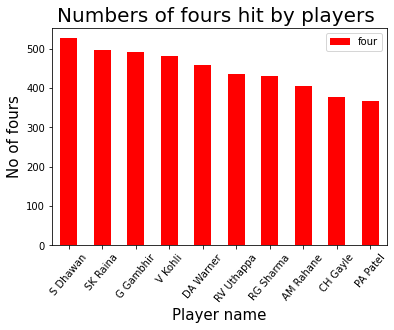

In [53]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='red')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

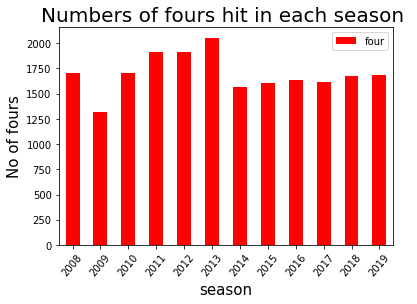

In [54]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [55]:
# we will print no of sixes hit by team
six_data=merge_df[merge_df['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


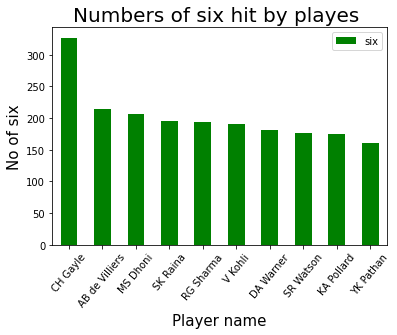

In [56]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

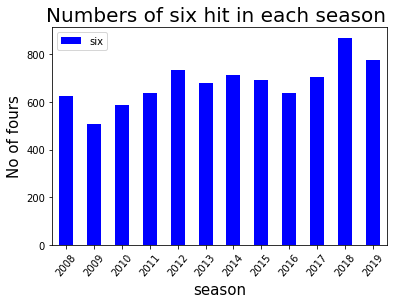

In [57]:
# we will plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue')
plt.title("Numbers of six hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [58]:
# We will print the top 10 leading run scorer in IPL
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [59]:
# we will print no of matches played by batsman
No_Matches_player= deliveries[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


c:\users\mohdf\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


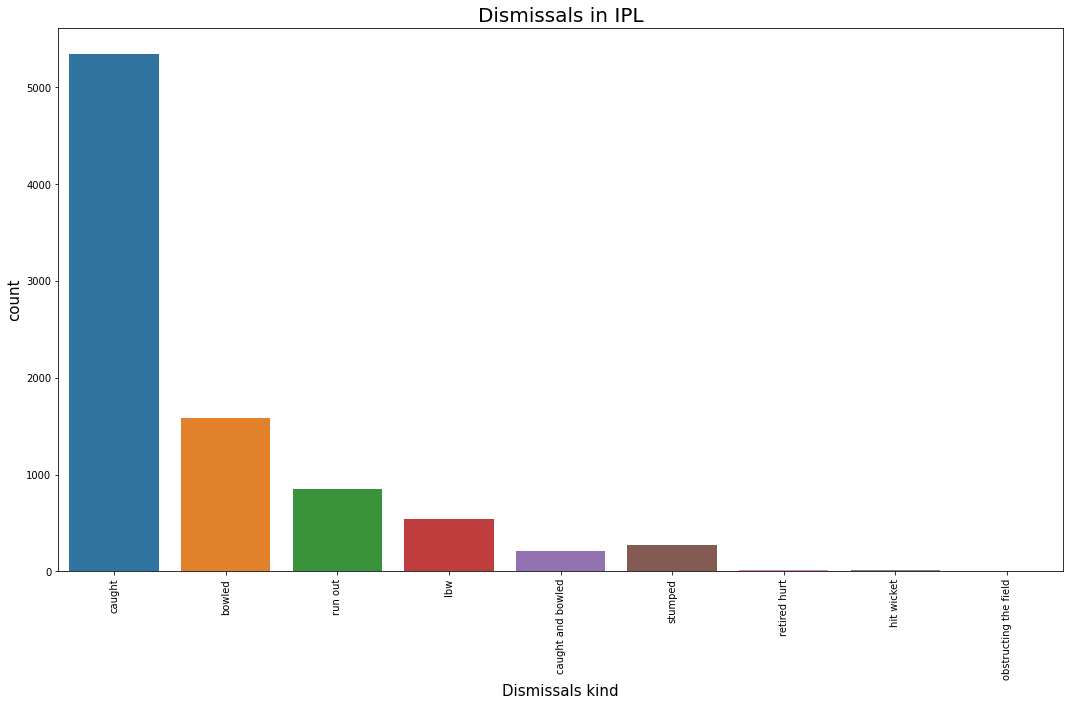

In [60]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(merge_df.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [61]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [62]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


# CONCLUSION

The highest number of match played in IPL season was 2011,2012,2013.
All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

Most teams decide to chase down totals after winning toss except for CSK which goes well with the fact that the have won most games (by good margin) by defending

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

SK has beaten opponents most number of times by big run margin. Also CSK has mostly decided to bat first after winning toss 
which explains their winning by runs phenomenon

The highest number of four hit by player is S Dhawan.

The highest number of six hit by player is CH Gayle.

Top leading run scorer in IPL are Virat Kohli, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma 

Dismissals in IPL was most by Catch out .

The IPL most wicket taken bowler is SL Malinga.

Thank You!